(fw)=
# Part 2: Sing O Muse

```{note}
- Simulated: essentially conjuring order (parameters) from chaos (random variation)
- Real: can a perfect simulation be `identified` or distinguished from real data?
- Missing: hypothesis elements (principle investigator), data access (clinical notes), client usage (format for patient-caregiver)
- Imputation: we are doing it anyway, e.g. complete data analysis, so this lays an iterative roadmaps to better inferences
- Names: the whole Donny misunderstanding Lenin for John Lennon part is just pure genius. I am the walrus hahahahah
```

<iframe src="app/risk.html" width="100%" height="600px" style="borders:none"></iframe>

You will find these details in the following chapters:

- {ref}`fw-aim1`
- {ref}`fw-aim2`
- {ref}`fw-aim3`



## Base-case

### $S_0$

$$
C(S, t) = S_0 \mathcal{N}(d_1) - X e^{-r(T-t)} \mathcal{N}(d_2)
$$

where:

$$
d_1 = \frac{\ln(S_0/X) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T-t}
$$

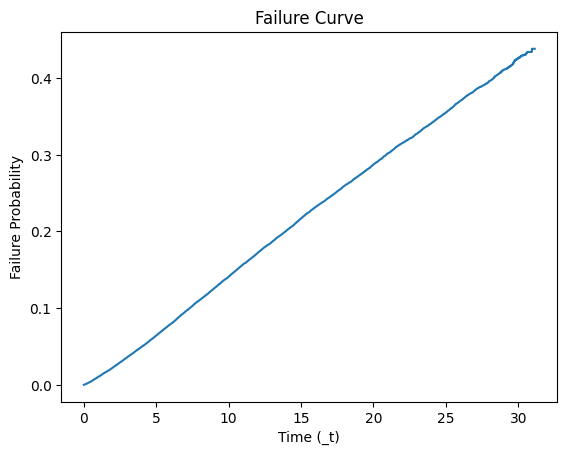

       _st  _d         _t  _t0  s0_nondonor
0        1   1  14.748802    0     0.788091
1        1   0  29.927446    0     0.576725
2        1   0  29.746748    0     0.578996
3        1   0  19.203285    0     0.725669
4        1   0  20.213552    0     0.711040
...    ...  ..        ...  ...          ...
73563    1   0   2.214921    0     0.974868
73564    1   0   1.516769    0     0.983511
73565    1   0   1.415469    0     0.984641
73566    1   0   1.960301    0     0.978229
73567    1   0   1.100616    0     0.988551

[73568 rows x 5 columns]


In [4]:
# courtesy of meta.ai

import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the data from the CSV file
s0_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/s0_nondonor.csv', header=0)

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimate to the data
kmf.fit(s0_df['_t'], event_observed=s0_df['_d'])

# Get the survival probabilities
survival_probabilities = kmf.survival_function_

# Calculate the failure probabilities (1 - survival probability)
failure_probabilities = 1 - survival_probabilities

# Plot the failure curve
plt.plot(kmf.timeline, failure_probabilities)
plt.xlabel('Time (_t)')
plt.ylabel('Failure Probability')
plt.title('Failure Curve')
plt.show()
print(s0_df)

## Beta Coefficients

In [8]:
b_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/b_nondonor.csv', header=0)
print(b_df)

   A         B  C         D  E         F  G         H         I  J  ...  AW  \
0  0  0.361154  0  0.299617  0 -0.139638  0  0.124114  0.438236  0  ...   0   

         AX        AY        AZ        BA        BB        BC       BD  \
0  0.178476  1.200497  0.074832  0.004682 -0.003239  0.000075 -0.00227   

         BE        BF  
0  0.000005  0.000021  

[1 rows x 58 columns]


In [9]:
import pandas as pd

# Define the meaningless headers and data provided
columns = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
    "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM", "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU",
    "AV", "AW", "AX", "AY", "AZ", "BA", "BB", "BC", "BD", "BE", "BF"
]

data = [
    0, 0.3611540640749626, 0, 0.2996174782817143, 0, -0.1396380267801064, 0, 0.1241139571516237, 0.438236411976324, 0, 
    -0.059895226414333, 0, 0.3752078798205875, 0, 0.0927075946775824, -0.0744371973326359, 0.1240852498460039, -0.0176059111708996, 
    -0.0684981196640994, -0.1339078132620516, -0.1688485989105275, -0.1749309513874832, -0.232756397671939, 0.0548690007396233, 
    0.0072862860322084, -0.3660394524818282, -0.4554416752427064, -0.1691931796222081, -0.0781079363323375, 0.368728384689242, 0, 
    -0.5287614160906285, -0.5829729708389515, 0, -0.1041236831513535, -0.5286676823325914, -0.2297292995090682, -0.1657466825095737, 
    0, 0.2234811404289921, 0.5530365583277806, -43.66976587951415, 0.6850541632181936, 0.3546286547464611, 0.2927117177058185, 
    0.2910135188333163, 0.1551116553040275, 0.1682748362958531, 0, 0.1784756812804011, 1.200496862053446, 0.0748319011956608, 
    0.0046824977599823, -0.0032389485781854, 0.0000754693150546, -0.0022698686486925, 5.11669774511e-06, 0.0000213400932172
]

# Create a DataFrame
b_df = pd.DataFrame([data], columns=columns)

# Define the variable names provided
variable_names = [
    "diabetes_no", "diabetes_yes", "insulin_no", "insulin_yes", "dia_pill_no", "dia_pill_yes",
    "hypertension_no", "hypertension_yes", "hypertension_dont_know", "hbp_pill_no", "hbp_pill_yes",
    "smoke_no", "smoke_yes", "income_adjusted_ref", "income_adjusted_5000-9999", "income_adjusted_10000-14999",
    "income_adjusted_15000", "income_adjusted_20000", "income_adjusted_25000", "income_adjusted_35000",
    "income_adjusted_45000", "income_adjusted_55000", "income_adjusted_65000-74999", "income_adjusted_>20000",
    "income_adjusted_<20000", "income_adjusted_14", "income_adjusted_15", "refused_to_answer", "dont_know",
    "gender_female", "gender_male", "race_white", "race_mexican_american", "race_other_hispanic",
    "race_non_hispanic_black", "race_other", "hs_good", "hs_excellent", "hs_very_good", "hs_fair", "hs_poor",
    "hs_refused", "hs_8", "hs_dont_know", "education_ref_none", "education_k8", "education_some_high_school",
    "education_high_school", "education_some_college", "education_more_than_college", "education_refused",
    "age_centered", "boxcar_new_centered", "bmi_centered", "egfr_centered", "uacr_centered", "ghp"
]

# Add an additional label to match the number of columns in the DataFrame
variable_names.append("extra_label")

# Apply the variable names to the DataFrame
b_df.columns = variable_names

# Display the DataFrame
print(b_df)


   diabetes_no  diabetes_yes  insulin_no  insulin_yes  dia_pill_no  \
0            0      0.361154           0     0.299617            0   

   dia_pill_yes  hypertension_no  hypertension_yes  hypertension_dont_know  \
0     -0.139638                0          0.124114                0.438236   

   hbp_pill_no  ...  education_some_college  education_more_than_college  \
0            0  ...                       0                     0.178476   

   education_refused  age_centered  boxcar_new_centered  bmi_centered  \
0           1.200497      0.074832             0.004682     -0.003239   

   egfr_centered  uacr_centered       ghp  extra_label  
0       0.000075       -0.00227  0.000005     0.000021  

[1 rows x 58 columns]


## Scenario Vector

In [5]:
SV_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/SV_nondonor.csv', header=0)
print(SV_df)

   SV_nondonor1  SV_nondonor2  SV_nondonor3  SV_nondonor4  SV_nondonor5  \
0             1             0             1             0             0   

   SV_nondonor6  SV_nondonor7  SV_nondonor8  SV_nondonor9  SV_nondonor10  ...  \
0             1             1             0             0              1  ...   

   SV_nondonor49  SV_nondonor50  SV_nondonor51  SV_nondonor52  SV_nondonor53  \
0              0              1              0            -20              0   

   SV_nondonor54  SV_nondonor55  SV_nondonor56  SV_nondonor57  SV_nondonor58  
0              0              0             30              0              0  

[1 rows x 58 columns]


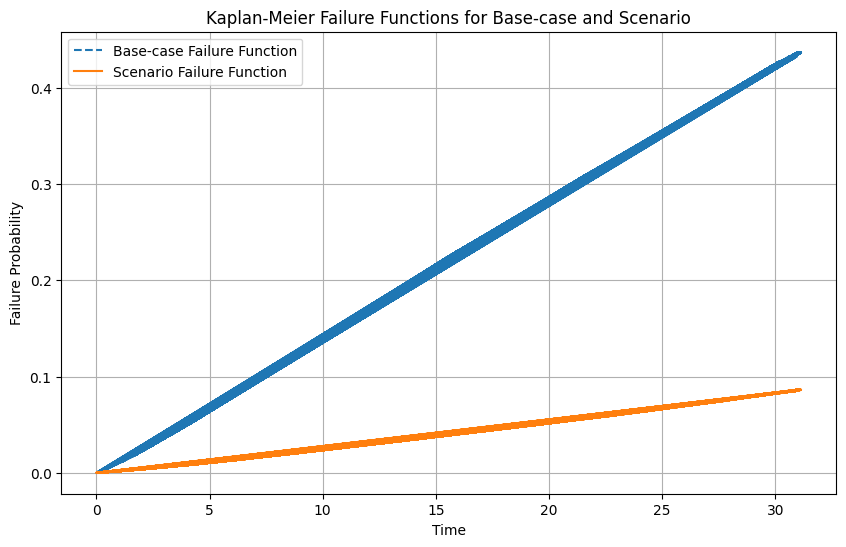

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV files
SV_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/SV_nondonor.csv', header=0)
coefficients_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/b_nondonor.csv', header=0)
s0_df = pd.read_csv('~/documents/rhythm/business/kitabo/ensi/data/s0_nondonor.csv', header=0)

# Step 2: Apply the variable names to the scenario vector and coefficient vector
variable_names = [
    "diabetes_no", "diabetes_yes", "insulin_no", "insulin_yes", "dia_pill_no", "dia_pill_yes",
    "hypertension_no", "hypertension_yes", "hypertension_dont_know", "hbp_pill_no", "hbp_pill_yes",
    "smoke_no", "smoke_yes", "income_adjusted_ref", "income_adjusted_5000-9999", "income_adjusted_10000-14999",
    "income_adjusted_15000", "income_adjusted_20000", "income_adjusted_25000", "income_adjusted_35000",
    "income_adjusted_45000", "income_adjusted_55000", "income_adjusted_65000-74999", "income_adjusted_>20000",
    "income_adjusted_<20000", "income_adjusted_14", "income_adjusted_15", "refused_to_answer", "dont_know",
    "gender_female", "gender_male", "race_white", "race_mexican_american", "race_other_hispanic",
    "race_non_hispanic_black", "race_other", "hs_good", "hs_excellent", "hs_very_good", "hs_fair", "hs_poor",
    "hs_refused", "hs_8", "hs_dont_know", "education_ref_none", "education_k8", "education_some_high_school",
    "education_high_school", "education_some_college", "education_more_than_college", "education_refused",
    "age_centered", "boxcar_new_centered", "bmi_centered", "egfr_centered", "uacr_centered", "ghp"
]
variable_names.append("extra_label")

SV_df.columns = variable_names
coefficients_df.columns = variable_names

# Step 3: Compute the scenario survival probabilities
scenario = SV_df.iloc[0].values
coefficients = coefficients_df.iloc[0].values

log_hazard_ratio = np.dot(scenario, coefficients)
baseline_hazard = -np.log(s0_df['s0_nondonor'])
scenario_hazard = baseline_hazard * np.exp(log_hazard_ratio)

# Step 4: Convert survival probabilities to failure probabilities
baseline_failure = 1 - s0_df['s0_nondonor']
scenario_failure = 1 - np.exp(-scenario_hazard)

# Step 5: Plot the failure functions
plt.figure(figsize=(10, 6))
plt.plot(s0_df['_t'], baseline_failure, label='Base-case Failure Function', linestyle='--')
plt.plot(s0_df['_t'], scenario_failure, label='Scenario Failure Function', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Failure Probability')
plt.title('Kaplan-Meier Failure Functions for Base-case and Scenario')
plt.legend()
plt.grid(True)
plt.show()


Sure, let's make it more engaging and detailed. Here's a clinical summary of the patient based on the given scenario vector:

### Clinical Notes:

This risk personalization is for a 60-year-old woman, given the centering age of 60 years.

- **Diabetes:** She does not have diabetes.
- **Insulin Usage:** She does not use insulin.
- **Diabetes Pill Usage:** She takes diabetes pills.
- **Hypertension:** She has hypertension.
- **High Blood Pressure Medication:** She is on medication for high blood pressure.
- **Smoking Status:** She does not smoke.
- **Income Level:** She belongs to the reference income group, which indicates a baseline category for income.
- **Gender:** Female.
- **Race:** She is of Mexican American descent.
- **Health Status:** Her health status is reported as excellent.
- **Education Level:** She has a K-8 education level.
- **Body Mass Index (BMI):** Centered around the population mean.
- **Estimated Glomerular Filtration Rate (eGFR):** Centered around the population mean.
- **Urine Albumin-to-Creatinine Ratio (UACR):** Centered around the population mean.
- **Glucose-6-Phosphate Dehydrogenase (G6PD) Levels:** Centered around the population mean.

### Additional Details:

- **Refused to answer other questions** related to income levels beyond the reference category.
- **Age-Centered Adjustments:** The patient’s specific clinical metrics (BMI, eGFR, UACR) are centered around the average values for a 60-year-old, indicating adjustments have been made to personalize risk based on age-related norms.
  
### Clinical Implications:

This patient profile suggests a middle-aged woman who is generally in good health, well-managed in terms of her hypertension and diabetes, and has a background of modest education and income. The personalized risk assessment aims to provide a more accurate prediction based on her specific demographic and clinical characteristics.

This summary should help understand the risk profile for this individual and guide personalized clinical decisions.

To set up a tidy workflow for updating your app whenever you receive new sets of CSV files, you can follow these steps:

1. **Organize your file structure**: Ensure your project has a clear structure for data, scripts, and deployment.
2. **Create a script to automate the update process**: Write a script that will read the new CSV files, process the data, and update your app.
3. **Use a version control system (Git)**: Track changes and manage updates using Git.
4. **Deploy the updated app**: Automate the deployment process using tools like GitHub Pages or a CI/CD pipeline.

### Directory Structure
Ensure your directory structure looks like this:

```
ensi/
│
├── data/
│   ├── SV_nondonor.csv
│   ├── b_nondonor.csv
│   └── s0_nondonor.csv
│
├── part2/
│   └── app/
│       ├── assets/
│       │   └── js/
│       │       └── script.js
│       ├── index.html
│       └── README.md
│
├── update_data.py
├── requirements.txt
└── README.md
```

### Step-by-Step Workflow

1. **Write a Python script to update the data**:

Create a `update_data.py` script to read the CSV files, process the data, and update the necessary JavaScript files.

```python
import pandas as pd
import os

# Paths to the CSV files
data_dir = 'data'
sv_file = os.path.join(data_dir, 'SV_nondonor.csv')
b_file = os.path.join(data_dir, 'b_nondonor.csv')
s0_file = os.path.join(data_dir, 's0_nondonor.csv')

# Read the CSV files
sv_df = pd.read_csv(sv_file)
b_df = pd.read_csv(b_file)
s0_df = pd.read_csv(s0_file)

# Process the data if needed
# For example, if you need to format or clean the data, you can do it here

# Update JavaScript files with new data
js_file_path = 'part2/app/assets/js/script.js'

# Function to update the JavaScript file
def update_js_file(js_file_path, sv_df, b_df, s0_df):
    with open(js_file_path, 'r') as file:
        js_content = file.read()
    
    # Update the JS file content with the new data
    sv_data = sv_df.to_csv(index=False, header=False).replace('\n', '\\n')
    b_data = b_df.to_csv(index=False, header=False).replace('\n', '\\n')
    s0_data = s0_df.to_csv(index=False, header=False).replace('\n', '\\n')
    
    js_content = js_content.replace(
        "const scenarioVector = [0, 0, 1]; // Default to general population scenario",
        f"const scenarioVector = [{sv_data}]; // Updated scenario vector"
    )
    
    js_content = js_content.replace(
        "let beta = [];",
        f"let beta = [{b_data}]; // Updated beta coefficients"
    )
    
    js_content = js_content.replace(
        "let s0 = [];",
        f"let s0 = [{s0_data}]; // Updated survival data"
    )
    
    with open(js_file_path, 'w') as file:
        file.write(js_content)

# Update the JavaScript file
update_js_file(js_file_path, sv_df, b_df, s0_df)

print("JavaScript file updated successfully.")
```

2. **Set up version control (Git)**:

Initialize a Git repository and commit your changes.

```sh
cd ensi
git init
git add .
git commit -m "Initial commit"
```

3. **Automate deployment with GitHub Pages or CI/CD**:

You can use GitHub Actions to automate the deployment process whenever there's a new commit to the repository. Create a GitHub Actions workflow file in `.github/workflows/deploy.yml`.

```yaml
name: Deploy to GitHub Pages

on:
  push:
    branches:
      - main

jobs:
  build-and-deploy:
    runs-on: ubuntu-latest
    
    steps:
    - name: Checkout code
      uses: actions/checkout@v2

    - name: Set up Python
      uses: actions/setup-python@v2
      with:
        python-version: '3.x'

    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt

    - name: Update data
      run: python update_data.py

    - name: Deploy to GitHub Pages
      uses: peaceiris/actions-gh-pages@v3
      with:
        github_token: ${{ secrets.GITHUB_TOKEN }}
        publish_dir: ./part2/app
```

4. **Commit and push your changes**:

```sh
git add .
git commit -m "Set up automated deployment"
git push origin main
```

### Usage

Whenever you receive new CSV files:
1. Replace the old CSV files in the `data` directory with the new ones.
2. Run the `update_data.py` script to process the new data and update the JavaScript files.
3. Commit and push the changes to GitHub.

```sh
python update_data.py
git add .
git commit -m "Update data files"
git push origin main
```

This workflow ensures that your app is always updated with the latest data and deployed automatically.


```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Nietzsche_paul-ree_lou-von-salome188.jpg/220px-Nietzsche_paul-ree_lou-von-salome188.jpg
---
width: 100%
name: banner-welcome
alt: Two people, a woman and a man, waving next to a banner that says - welcome.
---
*Power dynamics :)*
```

<iframe src="../amadeus.pdf" width="100%" height="1000" style="borders:none"></iframe>
<iframe src="../bach.pdf" width="100%" height="1000" style="borders:none"></iframe>
<iframe src="../handel.pdf" width="100%" height="1000" style="borders:none"></iframe>
